<head>
<meta content="text/html; charset=ISO-8859-1"
http-equiv="content-type">
<title></title>
</head>
<body>
<p style="text-align: center;" class="MsoNormal"><span
style="font-weight: bold; text-decoration: underline;">STTP on Scientific Computing with Python: Image and Video Processing</span></p>
<p style="text-align: center;" class="MsoNormal">Video Processing using OpenCV<o:p></o:p></p>
<p style="text-align: center;" class="MsoNormal"><img alt="OpenCV"
src="https://a.fsdn.com/allura/p/opencvlibrary/icon" /><br>
<span style="font-weight: bold; text-decoration: underline;"></span><o:p></o:p></p>
<p class="MsoNormal"><br>
<o:p></o:p></p>
    <p style="text-align: center;" class="MsoNormal">STTP on Scientific Computing with Python<o:p></o:p></p>
<p class="MsoNormal"><o:p>&nbsp;</o:p></p>
<p style="text-align: center;" class="MsoNormal"><span
style="font-style: italic;">Michael George, RIT Kottayam</span><o:p></o:p></p>
<br>
<p class="MsoNormal"><o:p></o:p></p>
</body>


<br><br><br><br><br><br><br><br><br><br>
<b>Working with Video</b>

<br>
Playing local videos within the notebook<br>

In [1]:
import cv2
from matplotlib.pyplot import *
%matplotlib inline
from IPython.display import clear_output


%cd ./data    

/media/michael/71C5B30E7B8EFF8E/STTP/Working/data


In [2]:
print(cv2.__version__)

4.4.0


In [3]:
!file Megamind.avi

Megamind.avi: RIFF (little-endian) data, AVI, 720 x 528, 23.98 fps, video: XviD, audio: Dolby AC3 (stereo, 48000 Hz)


In [4]:
def playvideo(vidname):
    vid = cv2.VideoCapture(vidname)

    try:
        while(True):
            ret, frame = vid.read()
            if not ret:
                vid.release()
                print("Released Video Resource1")
                break
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame = ourprocessing(frame)
            axis('off')
            title("Input Stream")
            imshow(frame)
            show()
            clear_output(wait=True)
    except KeyboardInterrupt:
        vid.release()
        print("Released Video Resource2")

#we'll override this to do some interesting stuff in a bit        
def ourprocessing(frame):
    return frame


In [5]:
playvideo('Megamind.avi')

Released Video Resource1


<b>Playing a video in an external window</b>
<br><small>(Notice it tends to play back much faster)</small>

In [7]:
def playvideowin(vidname,winname='video'):
    vid = cv2.VideoCapture(vidname)


    while(True):
        ret, frame = vid.read()
        if not ret:
            vid.release()
            print("Released Video Resource")
            break
        frame = ourprocessing(frame)
        
        cv2.namedWindow(winname)
        #cv2.startWindowThread() #this normally isn't required
        cv2.imshow(winname,frame)
        k=cv2.waitKey(50)
        
        if k==27: #exit is Esc is pressed
            break

    cv2.destroyAllWindows()

        

def ourprocessing(frame):
    return frame
        


In [8]:
playvideowin('Megamind.avi')

Released Video Resource


Now let's do some frame-by frame processing

In [9]:
def ourprocessing(frame):
    frame = cv2.GaussianBlur(frame,(29,29),0)
    return frame

playvideowin('Megamind.avi')


Released Video Resource


Exercise:  define your own "ourprocessing" function and use some of the techniques we learned in previous sessions

<b>Saving videos</b>

In [10]:
#let's open a video, process the frames, and save the output

cap = cv2.VideoCapture('Megamind.avi')

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 30.0, (720,528)) #I hardcoded the resolution for simplicity;
                                                            #generally you should check it and set accordingly

while True:
    ret, frame = cap.read()
    
    if not ret:
        break
        
    frame = ourprocessing(frame)
    
    out.write(frame)
    
cap.release()
out.release()


In [11]:
playvideowin('output.avi')


Released Video Resource


<br><br><br><br><br><br><b>Video Analysis and Object Tracking</b>

<b>Meanshift and Camshift</b>
<br>
https://docs.opencv.org/4.4.0/d7/d00/tutorial_meanshift.html

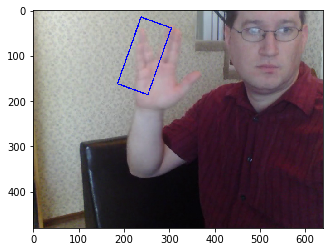

In [3]:

cap = cv2.VideoCapture('hand_track.mp4')
#cap = cv2.VideoCapture(0)

# take first frame of the video
ret,frame = cap.read()



# setup initial location of window
r,h,c,w = 30,150,155,80  # simply hardcoded the values

track_window = (c,r,w,h)

# set up the ROI for tracking
roi = frame[r:r+h, c:c+w]

hsv_roi =  cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )
cap.release()

figure()

for index in range(3):
    
    cap = cv2.VideoCapture('hand_track.mp4')
    #cap = cv2.VideoCapture(0)

    while(1):
        ret ,frame = cap.read()

        if ret == True:
            hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
            dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)

            # apply meanshift to get the new location
            ret, track_window = cv2.CamShift(dst, track_window, term_crit)

            # Draw it on image
            pts = cv2.boxPoints(ret)
            pts = np.int0(pts)
            img2 = cv2.polylines(frame,[pts],True, 255,2)
    #         cv2.imshow('img2',img2)
            #figure(figsize(8,8))
            imshow(cv2.cvtColor(img2,4))
            show()
            clear_output(wait=True)


        else:
            break

    cap.release()




<b>Optical flow</b><br>
"Optical flow is the pattern of apparent motion of image objects between two consecutive frames caused by the movemement of object or camera. It is 2D vector field where each vector is a displacement vector showing the movement of points from first frame to second. "
<br>
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_video/py_lucas_kanade/py_lucas_kanade.html#lucas-kanade

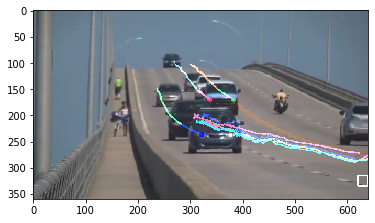

In [4]:
cap = cv2.VideoCapture('carsc.mp4')

# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Create some random colors
color = np.random.randint(0,255,(100,3))

# Take first frame and find corners in it
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)

# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)

figure()

while(1):
    ret,frame = cap.read()
    
    if not ret:
        break
    
    

    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

    # Select good points
    good_new = p1[st==1]
    good_old = p0[st==1]

    # draw the tracks
    for i,(new,old) in enumerate(zip(good_new,good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        mask = cv2.line(mask, (a,b),(c,d), color[i].tolist(), 2)
        frame = cv2.circle(frame,(a,b),5,color[i].tolist(),-1)
    img = cv2.add(frame,mask)

    imshow(cv2.cvtColor( img,4))
    show()
    clear_output(wait=True)

    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)




<b>Background Subtraction</b>
<br>
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_video/py_bg_subtraction/py_bg_subtraction.html
<br>
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html

In [5]:
cap = cv2.VideoCapture('768x576.avi')

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
fgbg = cv2.createBackgroundSubtractorMOG2()

while(1):
    ret, frame = cap.read()
    
    if not ret:
        break

    fgmask = fgbg.apply(frame)
    
    
    fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)

    cv2.imshow('frame',fgmask)
    
    
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()


<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/resframe.jpg">
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/resmog.jpg">

<b>Haar-Cascades for face and other object detection</b><br>
"Object Detection using Haar feature-based cascade classifiers is an effective object detection method proposed by Paul Viola and Michael Jones in their paper, “Rapid Object Detection using a Boosted Cascade of Simple Features” in 2001. It is a machine learning based approach where a cascade function is trained from a lot of positive and negative images. It is then used to detect objects in other images."
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html#face-detection

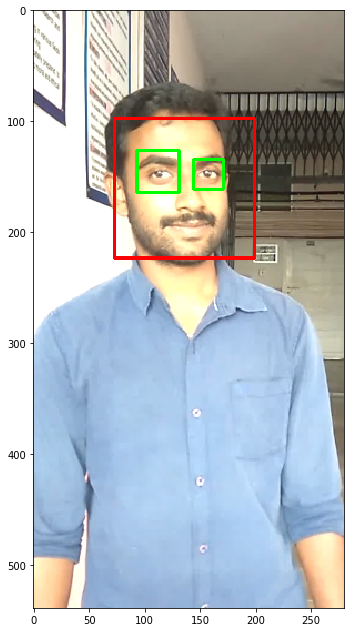

In [7]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_eye.xml')


img_data = cv2.imread('eby.png')
img = cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB)
###we got the image, converted it to a numpy array, and stored it in img

#the algorithm works on gray-scale images
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#this is the critical line of code here
faces = face_cascade.detectMultiScale(gray, 1.3, 5)  #those  last two parameters set the range of facial scales to detect

#iterate over face(s), find eyes and draw rectangles around found objects
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
figure(figsize=(12,11))
imshow(img)



<b>Exercises:</b>
<br>1.  Adapt the code above to work with a video.
<br>2.  Try some of the other included cascades on images/videos that you have

In [8]:
%pwd

[Errno 2] No such file or directory: 'data'
/media/michael/71C5B30E7B8EFF8E/STTP/Working/data


In [9]:
# importing necessary packages
#from imutils.video import VideoStream
#import imutils
import numpy as np
import argparse
import time
import cv2


# load our serialized model from disk
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe('./deploy.prototxt.txt','./res10_300x300_ssd_iter_140000.caffemodel')

face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

#initialize the video stream and allow camera sensor to warmup
print("[INFO] starting video stream, please wait...")

cap = cv2.VideoCapture('eby_vid.mp4')

# take first frame of the video
ret,frame = cap.read()


time.sleep(3)

# loop over the frames from the video stream
while True:
    # grab the frame from the threaded video stream and resize it
    # to have a maximum width of 1000 pixels
    ret,frame = cap.read()
    if not ret:
        break
    frame = cv2.resize(frame,(1000,1000))

    # grab the frame dimensions and convert it to a blob
    (h, w) = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0, (300, 300), (103.93, 116.77, 123.68))

    # pass the blob through the network and obtain the detections and predictions
    net.setInput(blob)
    detections = net.forward()
    
    
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    ###we got the image, converted it to a numpy array, and stored it in img

    #the algorithm works on gray-scale images
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    #this is the critical line of code here
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)  #those  last two parameters set the range of facial scales to detect

    #iterate over face(s), and draw rectangles around found objects
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        


    
    cv2.imshow("Haar Cascade Face detector", frame)
    key = cv2.waitKey(1) & 0xFF

    # if the 'q' key is pressed, break from the loop
    if key == ord("q"):
        break

# cleanup and closing frame
cv2.destroyAllWindows()

[INFO] loading model...
[INFO] starting video stream, please wait...


In [10]:
# importing necessary packages
#from imutils.video import VideoStream
#import imutils
import numpy as np
import argparse
import time
import cv2


# load our serialized model from disk
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe('./deploy.prototxt.txt','./res10_300x300_ssd_iter_140000.caffemodel')


#initialize the video stream and allow camera sensor to warmup
print("[INFO] starting video stream, please wait...")

cap = cv2.VideoCapture('eby_vid.mp4')

# take first frame of the video
ret,frame = cap.read()


time.sleep(3)

# loop over the frames from the video stream
while True:
    # grab the frame from the threaded video stream and resize it
    # to have a maximum width of 1000 pixels
    ret,frame = cap.read()
    if not ret:
        break
    frame = cv2.resize(frame,(1000,1000))

    # grab the frame dimensions and convert it to a blob
    (h, w) = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0, (300, 300), (103.93, 116.77, 123.68))

    # pass the blob through the network and obtain the detections and predictions
    net.setInput(blob)
    detections = net.forward()

    # loop over the detections
    for i in range(0, detections.shape[2]):
        # extract the confidence (i.e., probability) associated with the
        # prediction
        confidence = detections[0, 0, i, 2]

        # filter out weak detections by ensuring the `confidence` is
        # greater than the minimum confidence
        if confidence < 0.5:
            continue

        # compute the (x, y)-coordinates of the bounding box for the
        # object
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        # draw the bounding box of the face along with the associated
        # probability
        text = "{:.2f}%".format(confidence * 100)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.rectangle(frame, (startX, startY), (endX, endY),
                      (0, 0, 255), 2)
        cv2.putText(frame, text, (startX, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

    # show the output frame
    cv2.imshow("Deep Learned (SSD) Face detector", frame)
    key = cv2.waitKey(1) & 0xFF

    # if the 'q' key is pressed, break from the loop
    if key == ord("q"):
        break

# cleanup and closing frame
cv2.destroyAllWindows()

[INFO] loading model...
[INFO] starting video stream, please wait...
